In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [3]:
cd Dropbox/Portfolio/DataScience-Portfolio/Titanic

C:\Users\Sole\Dropbox\Portfolio\DataScience-Portfolio\Titanic


In [4]:
# load data (contains columns added in previous script)
titanic = pd.read_csv('Titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Title,CabinLetter,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,Mr,NaN,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,Mrs,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Miss,NaN,Alone


In [5]:
# create a survivor variable that says yes or no
titanic['Survivor'] = titanic['Survived'].map({0:'No', 1:'Yes'})
titanic['Survivor'].head(3)

0     No
1    Yes
2    Yes
Name: Survivor, dtype: object

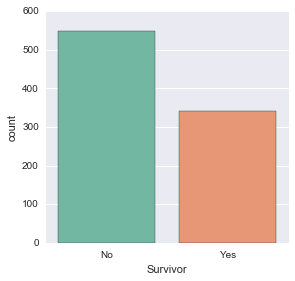

In [7]:
# plot survivors vs non survivors (number of people)
sns.factorplot('Survivor', data = titanic, kind = 'count', palette = 'Set2')

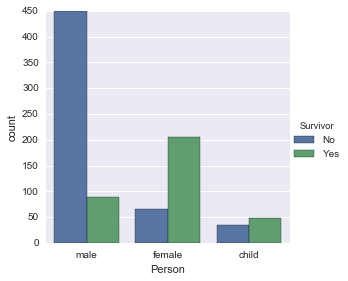

In [10]:
# plot number of survivors per men, women, child
sns.factorplot('Person', data = titanic, hue = 'Survivor', kind = 'count')

We see that the majority of women survived, but the great majority of men did not. Regarding children, almost the same number survived and didn't.

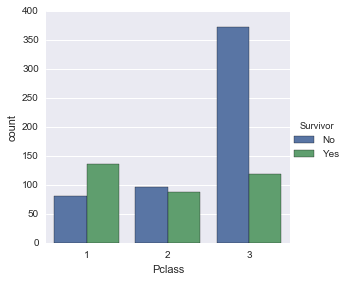

In [11]:
# survivors per class
sns.factorplot('Pclass', data = titanic, hue = 'Survivor', kind = 'count')

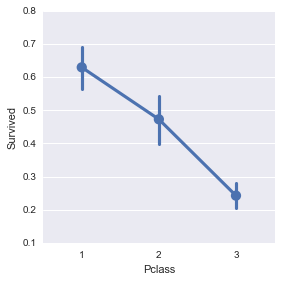

In [12]:
# percentage of survivors per class
sns.factorplot('Pclass', 'Survived', data = titanic)

This plot indicates the percentage of survivors per class. It is perhaps clearer than the bar plot above.

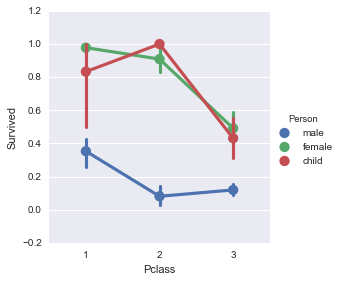

In [13]:
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic)

We see men did not show a high survival rate, regardless of the class they were in. As for women and children, being in class 3 meant that their chances of survival were lower.

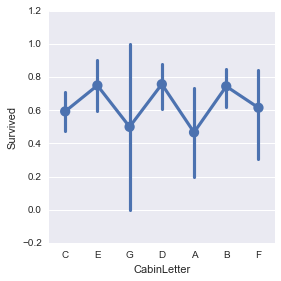

In [16]:
# percentage of survivors per deck
sns.factorplot('CabinLetter', 'Survived', data = titanic[titanic.CabinLetter != 'T'])

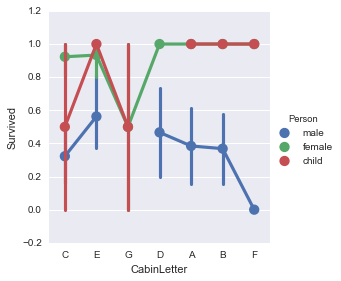

In [17]:
# percentage of survivors per deck segregated by men, women and children
sns.factorplot('CabinLetter', 'Survived', hue = 'Person', data = titanic[titanic.CabinLetter != 'T'])

Interesting: women and children from decks E, D, A, B and F all survived, but not those from decks C and G. For men though, survival rate did not seem to be influenced by the deck they were in.

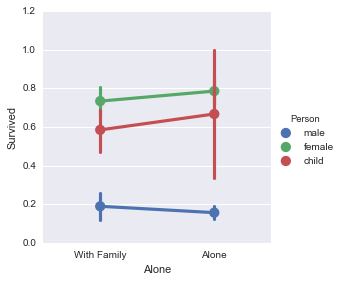

In [19]:
# percentage of survivors depending on traveling alone or with family
sns.factorplot('Alone', 'Survived', hue = 'Person', data = titanic)

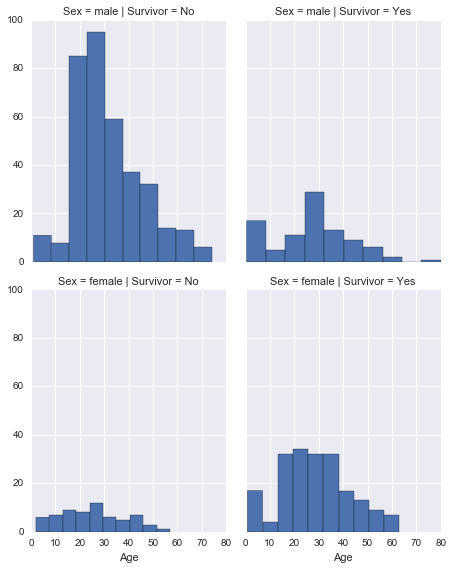

In [28]:
# age distribution per gender and survivors
g = sns.FacetGrid(titanic, col = 'Survivor', row = 'Sex', size = 4, aspect = .8)
g = g.map(plt.hist, 'Age')

This concludes the exploration of the characteristics that improved the chances of survival on the titanic. Next I will try to build a prediction model.